## Case Study Continued

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

### Cleaning the Data

In [111]:
new_df = pd.read_csv('Data/file4.csv')
new_df = new_df.drop("Unnamed: 0", axis=1)

<b> Remove irrelevant columns

In [112]:
new_df = new_df.drop(["Customer", "Vehicle Type", "Effective To Date", "Months Since Policy Inception", "Income"], axis=1)

In [113]:
new_df

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Arizona,4809.216960,No,Basic,College,Employed,M,Suburban,Married,61,7.0,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,California,2228.525238,No,Basic,College,Unemployed,F,Suburban,Single,64,3.0,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,Washington,14947.917300,No,Basic,Bachelor,Employed,M,Suburban,Single,100,34.0,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,Oregon,22332.439460,Yes,Extended,College,Employed,M,Suburban,Single,97,10.0,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,Oregon,9025.067525,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,117,NaN,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,Nevada,15563.369440,No,Premium,Bachelor,Unemployed,F,Suburban,Married,253,NaN,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,Oregon,5259.444853,No,Basic,College,Employed,F,Urban,Married,65,7.0,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,Arizona,23893.304100,No,Extended,Bachelor,Employed,F,Rural,Married,201,11.0,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,California,11971.977650,No,Premium,College,Employed,F,Urban,Divorced,158,0.0,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


<b> Deal with null values

In [114]:
new_df.isna().sum()

State                        631
Customer Lifetime Value        0
Response                     631
Coverage                       0
Education                      0
EmploymentStatus               0
Gender                         0
Location Code                  0
Marital Status                 0
Monthly Premium Auto           0
Months Since Last Claim      633
Number of Open Complaints    633
Number of Policies             0
Policy Type                    0
Policy                         0
Renew Offer Type               0
Sales Channel                  0
Total Claim Amount             0
Vehicle Class                622
Vehicle Size                 622
dtype: int64

In [115]:
new_df["Response"] = new_df["Response"].fillna("No")

In [116]:
new_df["Number of Open Complaints"] = new_df["Number of Open Complaints"].fillna(0.0)


In [117]:
new_df = new_df.dropna()

In [118]:
new_df.isna().sum()

State                        0
Customer Lifetime Value      0
Response                     0
Coverage                     0
Education                    0
EmploymentStatus             0
Gender                       0
Location Code                0
Marital Status               0
Monthly Premium Auto         0
Months Since Last Claim      0
Number of Open Complaints    0
Number of Policies           0
Policy Type                  0
Policy                       0
Renew Offer Type             0
Sales Channel                0
Total Claim Amount           0
Vehicle Class                0
Vehicle Size                 0
dtype: int64

In [119]:
new_df.value_counts()

State       Customer Lifetime Value  Response  Coverage  Education             EmploymentStatus  Gender  Location Code  Marital Status  Monthly Premium Auto  Months Since Last Claim  Number of Open Complaints  Number of Policies  Policy Type     Policy        Renew Offer Type  Sales Channel  Total Claim Amount  Vehicle Class  Vehicle Size
Arizona     5757.442258              Yes       Basic     Master                Employed          M       Rural          Divorced        72                    9.0                      0.0                        3                   Personal Auto   Personal L3   Offer2            Branch         174.041566          Four-Door Car  Small           4
California  14435.673650             Yes       Premium   Master                Employed          M       Rural          Married         119                   25.0                     0.0                        2                   Personal Auto   Personal L2   Offer1            Agent          109.906628          

<b> Remove outliers

<AxesSubplot:>

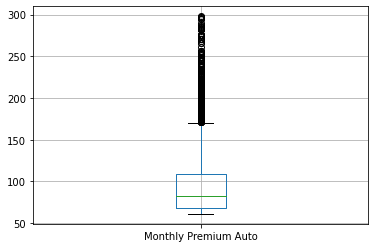

In [120]:
new_df.boxplot(["Monthly Premium Auto"])

<AxesSubplot:>

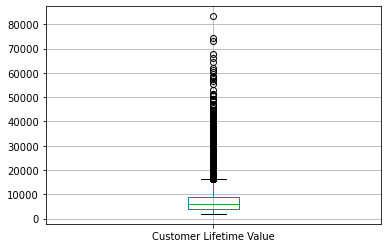

In [121]:
new_df.boxplot(["Customer Lifetime Value"])

<AxesSubplot:>

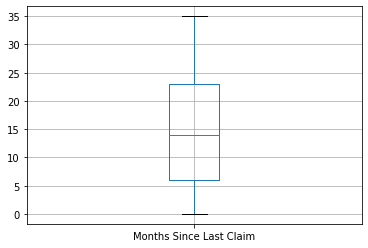

In [122]:
new_df.boxplot(["Months Since Last Claim"])

<AxesSubplot:>

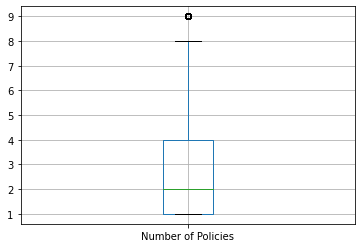

In [123]:
new_df.boxplot(["Number of Policies"])

In [124]:
new_df_n = new_df._get_numeric_data()
new_df_n

,Customer Lifetime Value,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,Total Claim Amount
0,4809.216960,61,7.0,0.0,9,292.800000
1,2228.525238,64,3.0,0.0,1,744.924331
2,14947.917300,100,34.0,0.0,2,480.000000
3,22332.439460,97,10.0,0.0,2,484.013411
6,5035.035257,63,8.0,3.0,4,287.556107
...,...,...,...,...,...,...
10903,2771.663013,74,30.0,4.0,1,355.200000
10904,19228.463620,187,14.0,0.0,2,897.600000
10906,5259.444853,65,7.0,0.0,6,273.018929
10907,23893.304100,201,11.0,0.0,2,381.306996


In [125]:
new_df_c = new_df.select_dtypes(include=['object'])

In [126]:
new_df_n = new_df_n[(np.abs(stats.zscore(new_df_n)) < 2).all(axis=1)]
#new_df_n.reset_index(inplace=True)
new_df_n

,Customer Lifetime Value,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,Total Claim Amount
1,2228.525238,64,3.0,0.0,1,744.924331
2,14947.917300,100,34.0,0.0,2,480.000000
7,4956.247235,63,35.0,0.0,3,247.402353
8,5989.773931,154,33.0,0.0,1,739.200000
9,17114.328150,85,19.0,0.0,2,408.000000
...,...,...,...,...,...,...
10896,19776.566540,82,1.0,0.0,2,256.813837
10898,5807.659307,74,9.0,0.0,7,133.977857
10901,4547.892543,116,11.0,0.0,1,801.577478
10902,3579.023825,91,10.0,2.0,1,655.200000


In [127]:
new_df = new_df_n.merge(new_df_c,how='left',left_index=True,right_index=True)
new_df

,Customer Lifetime Value,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,Total Claim Amount,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
1,2228.525238,64,3.0,0.0,1,744.924331,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,14947.917300,100,34.0,0.0,2,480.000000,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
7,4956.247235,63,35.0,0.0,3,247.402353,California,No,Basic,High School or Below,Employed,M,Urban,Single,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize
8,5989.773931,154,33.0,0.0,1,739.200000,California,Yes,Premium,College,Employed,M,Suburban,Single,Personal Auto,Personal L1,Offer2,Branch,Sports Car,Medsize
9,17114.328150,85,19.0,0.0,2,408.000000,Oregon,No,Extended,Master,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer2,Agent,Four-Door Car,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10896,19776.566540,82,1.0,0.0,2,256.813837,Oregon,No,Extended,High School or Below,Employed,F,Urban,Divorced,Personal Auto,Personal L2,Offer3,Agent,Four-Door Car,Medsize
10898,5807.659307,74,9.0,0.0,7,133.977857,California,No,Basic,College,Employed,F,Rural,Single,Personal Auto,Personal L3,Offer4,Call Center,Two-Door Car,Medsize
10901,4547.892543,116,11.0,0.0,1,801.577478,Washington,No,Premium,Bachelor,Employed,M,Suburban,Married,Personal Auto,Personal L3,Offer4,Agent,Two-Door Car,Medsize
10902,3579.023825,91,10.0,2.0,1,655.200000,California,No,Extended,High School or Below,Employed,F,Suburban,Married,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Medsize


<b> Split into dependant and independant variables

array([[<AxesSubplot:title={'center':'Customer Lifetime Value'}>,
        <AxesSubplot:title={'center':'Monthly Premium Auto'}>],
       [<AxesSubplot:title={'center':'Months Since Last Claim'}>,
        <AxesSubplot:title={'center':'Number of Open Complaints'}>],
       [<AxesSubplot:title={'center':'Number of Policies'}>,
        <AxesSubplot:title={'center':'Total Claim Amount'}>]],
      dtype=object)

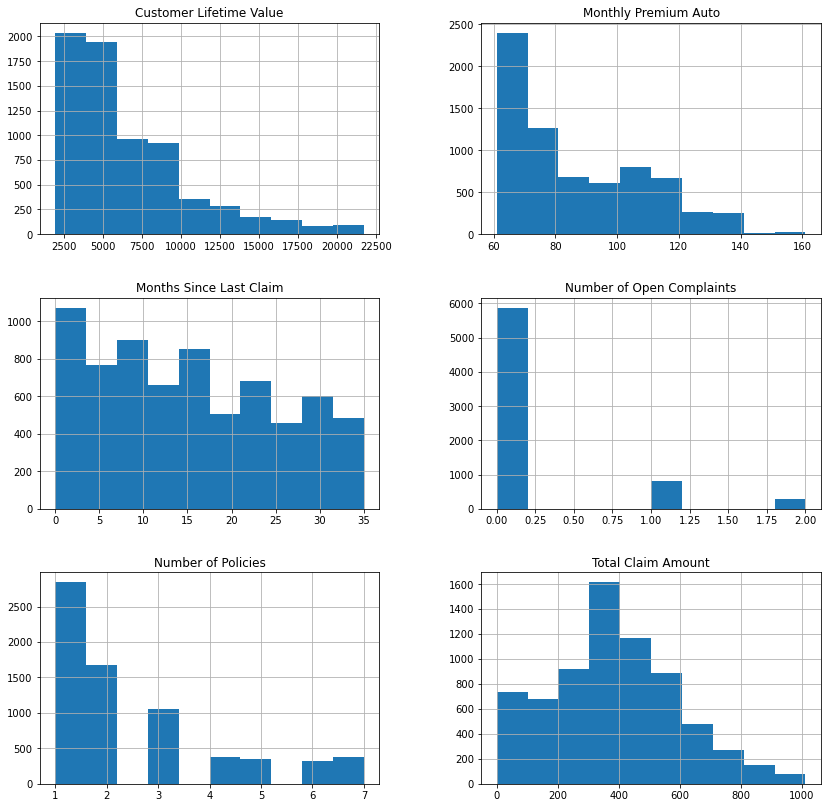

In [128]:
new_df.hist(figsize=(14,14))

In [129]:
x=new_df.drop("Total Claim Amount", axis=1)
y=new_df["Total Claim Amount"]

In [130]:
xn = x._get_numeric_data()
xn

,Customer Lifetime Value,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies
1,2228.525238,64,3.0,0.0,1
2,14947.917300,100,34.0,0.0,2
7,4956.247235,63,35.0,0.0,3
8,5989.773931,154,33.0,0.0,1
9,17114.328150,85,19.0,0.0,2
...,...,...,...,...,...
10896,19776.566540,82,1.0,0.0,2
10898,5807.659307,74,9.0,0.0,7
10901,4547.892543,116,11.0,0.0,1
10902,3579.023825,91,10.0,2.0,1


In [131]:
x_scaled = StandardScaler().fit_transform(xn)
x_scaled

array([[-1.07610579, -1.00713983, -1.19393116, -0.40585015, -0.82589798],
       [ 2.08883039,  0.62342058,  1.87676301, -0.40585015, -0.25686095],
       [-0.39737319, -1.05243318,  1.97581766, -0.40585015,  0.31217608],
       ...,
       [-0.49898312,  1.3481141 , -0.40149395, -0.40585015, -0.82589798],
       [-0.74006443,  0.21578048, -0.50054861,  3.64106389, -0.82589798],
       [-0.32192925, -0.96184649, -0.79771256, -0.40585015,  2.01928716]])

In [132]:
xc = x.select_dtypes(include=['object'])
xc = pd.get_dummies(xc, drop_first=True)
xc

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
1,1,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
7,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
8,1,0,0,0,1,0,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
9,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10896,0,0,1,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
10898,1,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,1,1,0
10901,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
10902,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [133]:
x = pd.concat([xn, xc], axis=1)
x

,Customer Lifetime Value,Monthly Premium Auto,Months Since Last Claim,Number of Open Complaints,Number of Policies,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,...,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
1,2228.525238,64,3.0,0.0,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2,14947.917300,100,34.0,0.0,2,0,0,0,1,0,...,1,0,0,1,0,1,0,0,1,0
7,4956.247235,63,35.0,0.0,3,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
8,5989.773931,154,33.0,0.0,1,1,0,0,0,1,...,0,0,1,0,0,0,1,0,1,0
9,17114.328150,85,19.0,0.0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10896,19776.566540,82,1.0,0.0,2,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
10898,5807.659307,74,9.0,0.0,7,1,0,0,0,0,...,0,1,0,1,0,0,0,1,1,0
10901,4547.892543,116,11.0,0.0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
10902,3579.023825,91,10.0,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Linear Regression

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

<b> Standardise

In [135]:
std_scaler=StandardScaler().fit(x_train)

x_train_scaled=std_scaler.transform(x_train)
x_test_scaled=std_scaler.transform(x_test)

<b> Model using Statsmodels

In [136]:
x_train_const_scaled = sm.add_constant(x_train_scaled) # adding a constant

model = sm.OLS(y_train, x_train_const_scaled).fit()
predictions = model.predict(x_train_const_scaled) 

x_test_const_scaled = sm.add_constant(x_test_scaled) # adding a constant
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     Total Claim Amount   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     459.3
Date:                Thu, 11 Nov 2021   Prob (F-statistic):               0.00
Time:                        17:57:03   Log-Likelihood:                -33468.
No. Observations:                5588   AIC:                         6.703e+04
Df Residuals:                    5543   BIC:                         6.732e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        384.1445      1.297    296.137      0.0

In [137]:
print(model.rsquared_adj)

0.7830552215480298


<b> Model using Scikit Learn

In [138]:
reg = LinearRegression().fit(x_train_scaled, y_train)

In [139]:
reg.coef_

array([-7.28390376e-01,  9.00534223e+01,  1.23441005e+00, -3.00700113e+00,
        6.56590640e-02,  3.41582413e-02,  4.01204392e-01, -4.38408036e-01,
        1.75093140e+00, -3.87286070e+00,  1.24634841e+00, -1.79725210e+00,
       -1.09366745e+00, -1.33287677e+00,  3.96211383e+00, -1.87232676e+00,
       -8.88704928e-01,  1.51189375e+00,  3.11040713e+00,  2.51678200e+01,
        3.61914236e+00,  1.72407767e+02,  7.89689081e+01, -1.29051428e+00,
        2.04214591e+01,  9.49432033e+11,  6.87614740e+12, -1.67503321e+00,
       -2.02988542e+00, -7.36595078e+11, -9.15938113e+11, -1.04420634e+12,
       -2.90588968e+12, -4.56970277e+12, -4.38629844e+12,  3.43980868e+00,
        2.67628326e+00,  2.93312968e+00,  2.17588929e+00, -5.30882024e-01,
        1.41296221e+00,  7.78976603e-01, -3.25707184e-02, -6.87317644e-01,
        1.88509957e+00,  7.11289798e+00])

In [140]:
reg.intercept_

384.1447704336048

In [141]:
reg.score(x_test_scaled, y_test)

0.7790330780564224

<b> Making Prediction

In [142]:
y_pred = reg.predict(x_test_scaled)
y_pred

array([450.28010008, 409.65729925, 506.00379656, ..., 422.13534627,
       740.1524722 , 231.91854626])

In [143]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
7830,345.600000,450.280100
4865,558.746277,409.657299
9731,465.600000,506.003797
6125,403.200000,463.953136
6107,328.362698,235.503799
...,...,...
3922,633.600000,577.982376
6623,340.800000,403.558198
6703,331.200000,422.135346
609,900.617364,740.152472


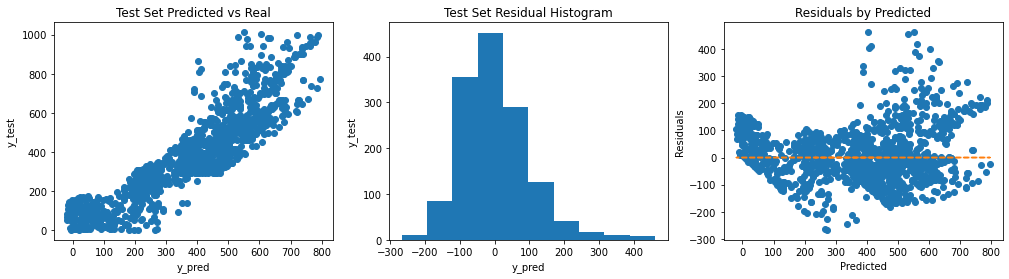

In [144]:
fig, ax = plt.subplots(1,3,figsize=(17,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_pred")
ax[0].set_ylabel("y_test")
ax[0].set_title("Test Set Predicted vs Real")

ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("y_pred")
ax[1].set_ylabel("y_test")
ax[1].set_title("Test Set Residual Histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("Predicted")
ax[2].set_ylabel("Residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

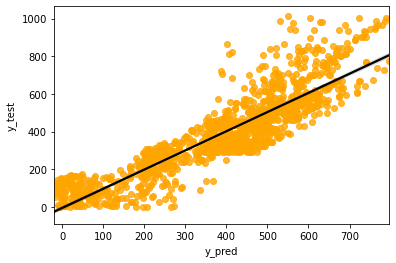

In [145]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "orange"}, line_kws={"color": "black"})

<b> Error Metrics

In [146]:
MSE = mse(y_test, y_pred)
MSE

9755.534492395882

In [147]:
RMSE = mse(y_test, y_pred, squared=False)
RMSE

98.77010930638825

In [148]:
MAE = mae(y_test, y_pred)
MAE

74.79736017687492

In [149]:
R2 = r2_score(y_test, y_pred)
R2

0.7790330780564224